In [1]:
from utils import DatabaseConnection
import matplotlib.pyplot as plt

path = ''
conn = DatabaseConnection(path + "cred_db.json")
conn.connect()

# Con Pandas

In [2]:
query="""
SELECT MAX(PRECIO) PRECIO_MAX, MIN(PRECIO) PRECIO_MIN, COUNT(*) CONTEO,
       AVG(PRECIO) PROMEDIO
FROM PRODUCTOS
"""
response = conn.execute_query(query)
response

Falta coneccion con la base de datos


In [3]:
query="""
SELECT PRECIO
FROM PRODUCTOS
"""
response = conn.execute_query(query)
response

Falta coneccion con la base de datos


In [4]:
response['PRECIO'].plot.hist(bins=15)

TypeError: 'NoneType' object is not subscriptable

In [ ]:
query="""
SELECT PRECIO, PRODUCTO
FROM PRODUCTOS
"""
response = conn.execute_query(query)
response

,PRECIO,PRODUCTO
0,5000,El kybalion
1,4000,Los cuatro acuerdos
2,600000,Aspiradora inteligente
3,1500000,Bajo
4,13990,Arnes
5,5000,Jenga
6,4590,Cubiertos de bambu
7,4000,Paraguas
8,30000,Tambor
9,220000,Celular


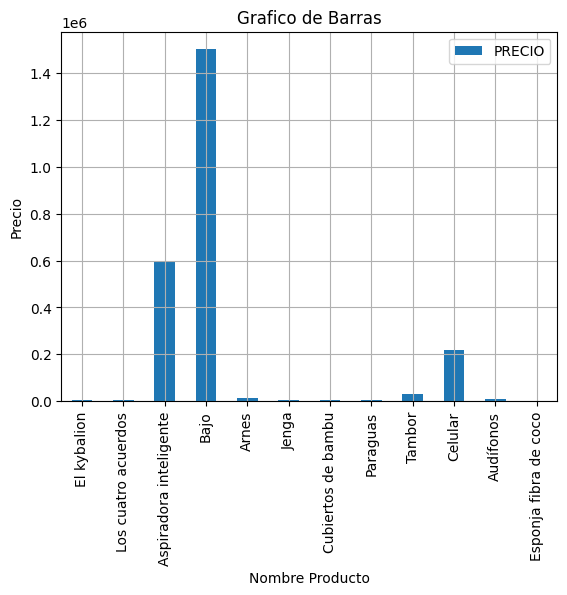

In [ ]:
response.plot.bar(y="PRECIO", x = "PRODUCTO")
plt.title('Grafico de Barras')
plt.xlabel('Nombre Producto')
plt.ylabel('Precio')
plt.grid(True)

#plt.show()

plt.savefig( path + "barras.png" )

# Cerrando conecciones

In [ ]:
conn.disconnect()

<bound method SSHTunnelForwarder.close of <class 'sshtunnel.SSHTunnelForwarder'> object
ssh gateway: 146.83.191.71:22
proxy: no
username: laboratorio
authentication: {'password': 'datafae2022'}
hostkey: not checked
status: started
keepalive messages: every 5.0 sec
tunnel connection check: disabled
concurrent connections: allowed
compression: not requested
logging level: ERROR
local binds: [('0.0.0.0', 0)]
remote binds: [('localhost', 33060)]>